In [1]:
import numpy as np
import matplotlib.pyplot as plt

from mltools import plot_data, plot_frontiere, make_grid, gen_arti

In [2]:
def mse(w,x,y):
    y = y.reshape(-1, 1)
    w = w.reshape(-1, 1)    
    x = x.reshape(y.shape[0],w.shape[0])
    return ((x.dot(w) - y)**2)

def reglog(w,x,y):
    y = y.reshape(-1, 1)
    w = w.reshape(-1, 1)    
    x = x.reshape(y.shape[0],w.shape[0])
    return np.log(1+np.exp(-y * np.dot(x,w)))


def mse_grad(w,x,y):
    y = y.reshape(-1, 1)
    w = w.reshape(-1, 1)    
    x = x.reshape(y.shape[0],w.shape[0])
    return x * (x.dot(w)  - y) * 2

def reglog_grad(w,x,y):
    y = y.reshape(-1, 1)
    w = w.reshape(-1, 1)    
    x = x.reshape(y.shape[0],w.shape[0])
    return -y*x / (1 + np.exp(y * x.dot(w)))

def grad_check(f,f_grad,N=100,t=1e-5):
    weights = np.random.rand(N, 1)
    datax = np.random.rand(N, 1)
    datay = np.random.randint(0, 2, N)
    for w in ws:
        values = f(weights, datax, datay)
        valuest = f(w + t, datax, datay)
        pts_grad = f_grad(w, datax, datay)
        res1,res2 = (valuest - values)/t,pts_grad
        print(np.max(np.abs(res1 - res2)) < t)
        
        
def descente_gradient(datax,datay,f_loss,f_grad,eps,itere,verbose = False):
    wst  = np.array([0,-100]) 
    w = []
    costs=[]
    for i in range(itere):
        gradient = f_grad(wst,datax,datay)
        print(gradient.shape)
        wst = wst - eps * gradient.mean(axis=0)
        w+=[wst]
        print((f_loss(wst,datax,datay)).shape)
        costs+=[f_loss(wst,datax,datay).mean(axis=0)]
    return wst,w, costs
    

(1000, 2)


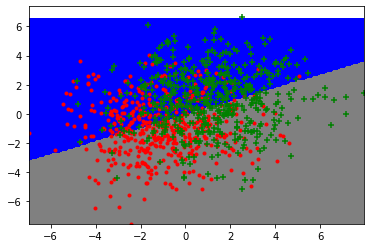

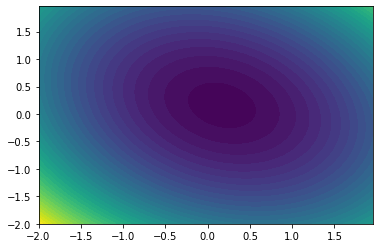

In [3]:
datax, datay = gen_arti(epsilon=2)
grid, x, y = make_grid(xmin=-2, xmax=2, ymin=-2, ymax=2, step=100)
plt.figure()
## Visualisation des données et de la frontière de décision pour un vecteur de poids w
print(datax.shape)
w = np.random.randn(datax.shape[1],1)
plot_frontiere(datax,lambda x : np.sign(x.dot(w)),step=100)
plot_data(datax,datay)
## Visualisation de la fonction de coût en 2D
plt.figure()
plt.contourf(x,y,np.array([mse(w,datax,datay).mean() for w in grid]).reshape(x.shape),levels=50)

(1000, 2)
(1000, 1)
(1000, 2)
(1000, 1)
(1000, 2)
(1000, 1)
(1000, 2)
(1000, 1)
(1000, 2)
(1000, 1)
(1000, 2)
(1000, 1)
(1000, 2)
(1000, 1)
(1000, 2)
(1000, 1)
(1000, 2)
(1000, 1)
(1000, 2)
(1000, 1)
(1000, 2)
(1000, 1)
(1000, 2)
(1000, 1)
(1000, 2)
(1000, 1)
(1000, 2)
(1000, 1)
(1000, 2)
(1000, 1)
(1000, 2)
(1000, 1)
(1000, 2)
(1000, 1)
(1000, 2)
(1000, 1)
(1000, 2)
(1000, 1)
(1000, 2)
(1000, 1)
(1000, 2)
(1000, 1)
(1000, 2)
(1000, 1)
(1000, 2)
(1000, 1)
(1000, 2)
(1000, 1)
(1000, 2)
(1000, 1)
(1000, 2)
(1000, 1)
(1000, 2)
(1000, 1)
(1000, 2)
(1000, 1)
(1000, 2)
(1000, 1)
(1000, 2)
(1000, 1)
(1000, 2)
(1000, 1)
(1000, 2)
(1000, 1)
(1000, 2)
(1000, 1)
(1000, 2)
(1000, 1)
(1000, 2)
(1000, 1)
(1000, 2)
(1000, 1)
(1000, 2)
(1000, 1)
(1000, 2)
(1000, 1)
(1000, 2)
(1000, 1)
(1000, 2)
(1000, 1)
(1000, 2)
(1000, 1)
(1000, 2)
(1000, 1)
(1000, 2)
(1000, 1)
(1000, 2)
(1000, 1)
(1000, 2)
(1000, 1)
(1000, 2)
(1000, 1)
(1000, 2)
(1000, 1)
(1000, 2)
(1000, 1)
(1000, 2)
(1000, 1)
(1000, 2)
(1000, 1)


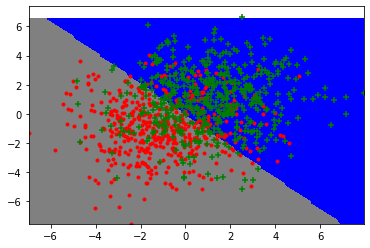

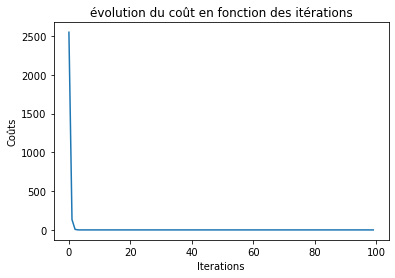

In [4]:
w_opti, w, costs = descente_gradient(datax,datay,mse,mse_grad,0.1,100)
print(w_opti)
#print(w)
#print(costs)
values = range(100)
values = np.array(values)
plt.figure() 
plot_frontiere(datax,lambda x : np.sign(x.dot(w_opti)),step=100)
plot_data(datax,datay)
plt.figure()
plt.title('évolution du coût en fonction des itérations')
plt.xlabel('Iterations')
plt.ylabel('Coûts')
plt.plot(values,costs)


In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# sckit-learn implementation

# Model initialization
regression_model = LinearRegression()
# Fit the data(train the model)
regression_model.fit(datax, datay)
# Predict
y_predicted = regression_model.predict(datax)

# model evaluation
rmse = mean_squared_error(datay, y_predicted)
r2 = r2_score(datay, y_predicted)

# printing values
print('Slope:' ,regression_model.coef_)
print('Intercept:', regression_model.intercept_)
print('Root mean squared error: ', rmse)
print('R2 score: ', r2)


Slope: [0.16392991 0.15557989]
Intercept: 0.021104302970446114
Root mean squared error:  0.6671131455027235
R2 score:  0.3328868544972765


(1000, 2)
(1000, 1)
(1000, 2)
(1000, 1)
(1000, 2)
(1000, 1)
(1000, 2)
(1000, 1)
(1000, 2)
(1000, 1)
(1000, 2)
(1000, 1)
(1000, 2)
(1000, 1)
(1000, 2)
(1000, 1)
(1000, 2)
(1000, 1)
(1000, 2)
(1000, 1)
(1000, 2)
(1000, 1)
(1000, 2)
(1000, 1)
(1000, 2)
(1000, 1)
(1000, 2)
(1000, 1)
(1000, 2)
(1000, 1)
(1000, 2)
(1000, 1)
(1000, 2)
(1000, 1)
(1000, 2)
(1000, 1)
(1000, 2)
(1000, 1)
(1000, 2)
(1000, 1)
(1000, 2)
(1000, 1)
(1000, 2)
(1000, 1)
(1000, 2)
(1000, 1)
(1000, 2)
(1000, 1)
(1000, 2)
(1000, 1)
(1000, 2)
(1000, 1)
(1000, 2)
(1000, 1)
(1000, 2)
(1000, 1)
(1000, 2)
(1000, 1)
(1000, 2)
(1000, 1)
(1000, 2)
(1000, 1)
(1000, 2)
(1000, 1)
(1000, 2)
(1000, 1)
(1000, 2)
(1000, 1)
(1000, 2)
(1000, 1)
(1000, 2)
(1000, 1)
(1000, 2)
(1000, 1)
(1000, 2)
(1000, 1)
(1000, 2)
(1000, 1)
(1000, 2)
(1000, 1)
(1000, 2)
(1000, 1)
(1000, 2)
(1000, 1)
(1000, 2)
(1000, 1)
(1000, 2)
(1000, 1)
(1000, 2)
(1000, 1)
(1000, 2)
(1000, 1)
(1000, 2)
(1000, 1)
(1000, 2)
(1000, 1)
(1000, 2)
(1000, 1)
(1000, 2)
(1000, 1)


<ipython-input-2-e09678b3683b>:11: RuntimeWarning: overflow encountered in exp
  return np.log(1+np.exp(-y * np.dot(x,w)))


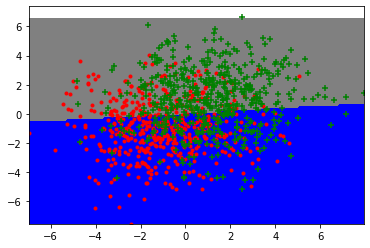

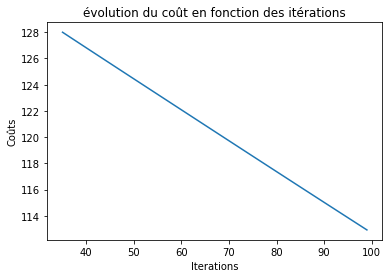

In [5]:
w_opti, w, costs = descente_gradient(datax,datay,reglog,reglog_grad,0.1,100)
print(w_opti)
#print(w)
#print(costs)
values = range(100)
values = np.array(values)
plt.figure() 
plot_frontiere(datax,lambda x : np.sign(x.dot(w_opti)),step=100)
plot_data(datax,datay)
plt.figure()
plt.title('évolution du coût en fonction des itérations')
plt.xlabel('Iterations')
plt.ylabel('Coûts')
plt.plot(values,costs)


In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression()
model.fit(datax, datay)
parameters = model.coef_
predicted_classes = model.predict(datax)
#accuracy = accuracy_score(y.flatten(),predicted_classes)
#print('The accuracy score using scikit-learn is {}'.format(accuracy))
print("The model parameters using scikit learn")
print(parameters)

The model parameters using scikit learn
[[0.48209722 0.45747888]]
